# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [3]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import matplotlib as plt
import json

with open('yearinfo.json', 'r') as json_file:
  yearinfo = json.load(json_file)
print(yearinfo)



{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [4]:
year = yearinfo['2010']
year[:5]

[{'band_singer': ['Kesha'],
  'song': ['/wiki/Tik_Tok_(song)'],
  'songurl': ['Tik Tok (song)'],
  'ranking': 1,
  'titletext': '"Tik Tok"',
  'url': ['/wiki/Kesha']},
 {'band_singer': ['Lady Antebellum'],
  'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
  'songurl': ['Need You Now (Lady Antebellum song)'],
  'ranking': 2,
  'titletext': '"Need You Now"',
  'url': ['/wiki/Lady_Antebellum']},
 {'band_singer': ['Train (band)'],
  'song': ['/wiki/Hey,_Soul_Sister'],
  'songurl': ['Hey, Soul Sister'],
  'ranking': 3,
  'titletext': '"Hey, Soul Sister"',
  'url': ['/wiki/Train_(band)']},
 {'band_singer': ['Katy Perry', 'Snoop Dogg'],
  'song': ['/wiki/California_Gurls'],
  'songurl': ['California Gurls'],
  'ranking': 4,
  'titletext': '"California Gurls"',
  'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
 {'band_singer': ['Usher (musician)', 'Will.i.am'],
  'song': ['/wiki/OMG_(Usher_song)'],
  'songurl': ['OMG (Usher song)'],
  'ranking': 5,
  'titletext': '"OMG"',
  'url': ['/

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

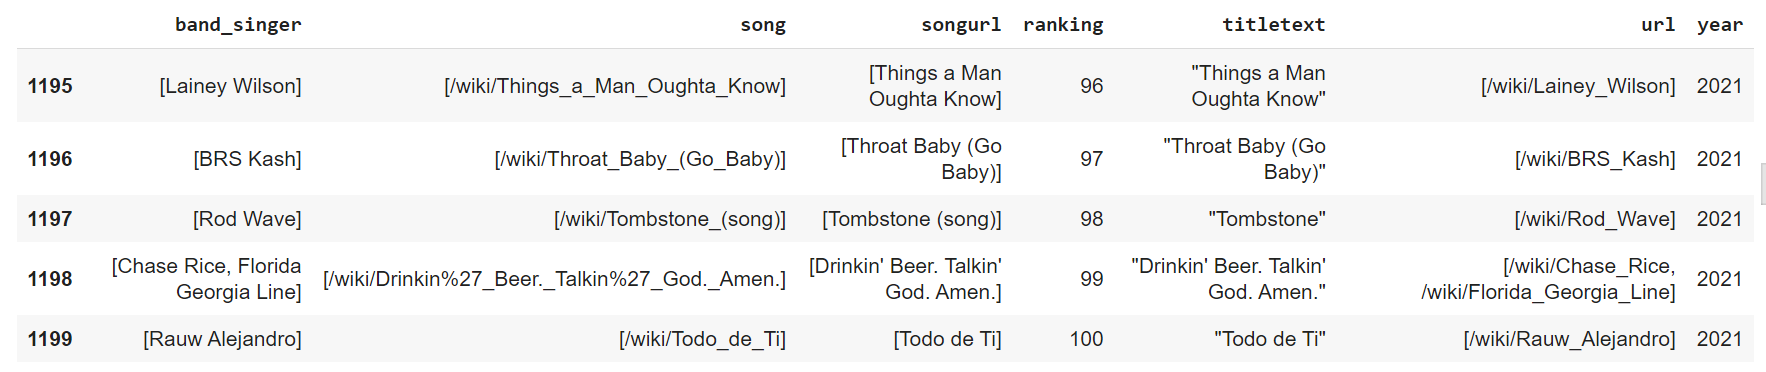

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [8]:
#write your code here
#list
data_list = []
for key, values in yearinfo.items(): #parsing tuple
    for i in values:
        data_list.append(list(i.values())+[key])
type(data_list)



list

In [9]:
list

list

In [20]:
#converting list to dataframe
df = pd.DataFrame(data_list)
df.head(1)

0                       1                 2  3          4  \
0  [Kesha]  [/wiki/Tik_Tok_(song)]  [Tik Tok (song)]  1  "Tik Tok"   

               5     6  
0  [/wiki/Kesha]  2010

In [21]:
#Renaming colums
df.columns = ['band_singer', 'song', 'songurl', 'ranking','titletext','url','year']
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [12]:
#checking for null values
df.isna().sum()

band_singer    0
song           0
song_url       0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [13]:
#datatype
df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [14]:
#changing datatype for year
df.year=df.year.astype('int')

In [15]:
df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year            int32
dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [22]:
 # Converting list to string
def get_singer(s):
  singer = s[0]
  return singer
df['band_singer'] = df.band_singer.map(get_singer)
df['song'] = df.song.map(get_singer)
df['songurl'] = df.songurl.map(get_singer)
df['url'] = df.url.map(get_singer)
df.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [23]:
#Determing highest frequcies band_singer
best_singer = df['band_singer'].value_counts()[:20]
data = pd.DataFrame(best_singer)
data

band_singer
Drake (musician)           26
Rihanna                    21
Maroon 5                   21
Ariana Grande              20
Taylor Swift               19
The Weeknd                 16
Justin Bieber              14
Katy Perry                 14
Chris Brown                14
Ed Sheeran                 13
Post Malone                13
Imagine Dragons            12
Adele                      11
Lady Gaga                  11
Bruno Mars                 11
Shawn Mendes               11
Lil Baby                   10
Cardi B                    10
Usher (musician)           10
Jason Derulo               10

In [24]:
 print(type(data))
greater_15 = data.loc[data['band_singer'] >= 15 ] # Selecting whose frequencies is greater than 15
greater_15

<class 'pandas.core.frame.DataFrame'>


band_singer
Drake (musician)           26
Rihanna                    21
Maroon 5                   21
Ariana Grande              20
Taylor Swift               19
The Weeknd                 16

In [21]:
#list to dataframe
singer_df = pd.DataFrame(newlist)
singer_df.columns = ['band_singer']
singer_df.head(5)

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

Text(0, 0.5, 'Frequencies')

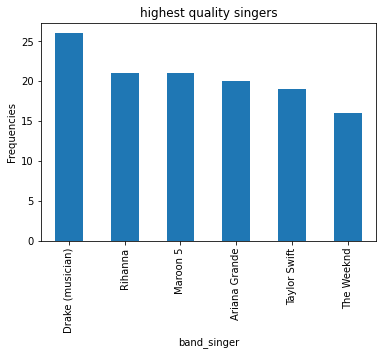

In [25]:
 #Ploting bar plot
import matplotlib.pyplot as plt
%matplotlib inline
greater_15['band_singer'].plot(kind="bar")
plt.title("highest quality singers")
plt.xlabel("band_singer")
plt.ylabel("Frequencies")

In [ ]:
#Drake is highest quality singer

**Question: Who is the most profilic singer?**


### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [32]:
#write your code here
#Creating new dataframe as metric_data
metric_data = df
metric_data.head(5)


band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [33]:
# Fetching single ranking value
ranking = metric_data.ranking[0]
type(ranking)
print(type(ranking))

<class 'numpy.int64'>


In [37]:
# Creating new score column
def get_ranking(ranking):
  score = 101 - ranking
  return score

metric_data['score'] = metric_data.ranking.map(get_ranking)
metric_data.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  score  
0                              [/wiki/Kesha]  2010    100  
1                    [/wiki/Lady_Antebellum]  2010     99  
2                       [/wiki/Train_(band)]  2010     98  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010     97  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010     96

In [38]:
# Sorting score column
metric_data.sort_values(['score'],ascending = False, inplace = True)
metric_data.head()

band_singer                         song               song_url  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

In [39]:
# Creating new dataframe
total_data = metric_data[['band_singer','score']]
total_data.head()

band_singer  score
0                Kesha    100
100          Shontelle    100
1100          Yo Gotti    100
1000  Usher (musician)    100
900       Shawn Mendes    100

In [41]:
# Total score of band_singer
total_score = total_data.groupby('band_singer').sum()
t = total_score.sort_values(by = 'score', ascending = False)
t = t['score'][:20]# Selecting Top 20 singers

In [42]:
# Ploting bar plot
top_20 = pd.DataFrame(t)
top_20['score'].plot(kind = "bar")
plt.ylabel('score')
plt.title("Top 20 singers")

Text(0.5, 1.0, 'Top 20 singers')

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [27]:
#Find the best singer in year 2021 


In [28]:
len(df.groupby('year'))

12

In [51]:
df.head()

band_singer                         song               song_url  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

In [57]:
# Framing new dataframe from df dataframe
new_data = df[['band_singer','ranking','year']]
# Grouping by year
year = new_data.groupby('year')
# Selecting particular group
year = year.get_group(2021)
# Finding highest frequency over particular group
highest_frequency = year['band_singer'].value_counts(sort = True)[:10]
highest_frequency

Drake (musician)    5
Post Malone         4
Maroon 5            3
Gucci Mane          3
Migos               3
Cardi B             3
Young Thug          2
Travis Scott        2
21 Savage           2
Nicki Minaj         2
Name: band_singer, dtype: int64

In [58]:
# Converting series to DataFrame
year2021 = pd.DataFrame(highest_frequency)
year2021

band_singer
Drake (musician)            5
Post Malone                 4
Maroon 5                    3
Gucci Mane                  3
Migos                       3
Cardi B                     3
Young Thug                  2
Travis Scott                2
21 Savage                   2
Nicki Minaj                 2

Text(0, 0.5, 'Frequency')

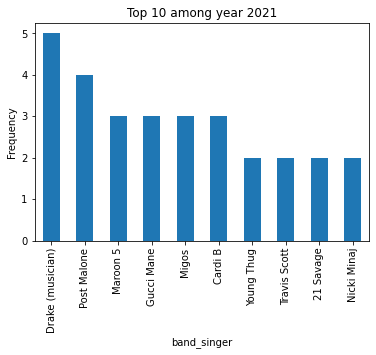

In [60]:
# Plotting bar plot
year2021['band_singer'].plot(kind = "bar")
plt.title("Top 10 among year 2021")
plt.xlabel('band_singer')
plt.ylabel('Frequency')

In [64]:
#This visualization show that top 10 best singer in a year 2021. Among them Drake(musician) has the highest appearence 

## SUBMISSION DATE: 2nd April 2022 